In [1]:
# Selenium 설치.
# !pip install selenium

In [2]:
import numpy as np
import re
import time
import matplotlib.pyplot as plt

import urllib.request
import requests as rq
import bs4

import konlpy
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [3]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

def cleaning(argStr):
    argStr = argStr.lower()
    argStr = re.sub(r'[^가-힣0-9a-z.?!]',  ' ',argStr)
    argStr = re.sub("^.*back", "", argStr)
    argStr = re.sub(r'\s+', ' ',argStr)
    argStr = re.sub(r'\s$', '' ,argStr)
    return(argStr)

def getLstUrlNews(argLstHl):
    lstHyperLinkNews = []
    for hl in argLstHl:
        hlSubj = hl.find('strong')
        if hlSubj:
            strSubj = hlSubj.text
            if (len(strSubj) > 10):
                lstHyperLinkNews.append(hl)
                
    lstLinkNews = [x.get("href") for x in lstHyperLinkNews]
    return(lstLinkNews)

def modiUrl(argUrl):    
    if "https://news.naver.com" not in argUrl:
        argUrl = "https://news.naver.com" + argUrl
        
    return(argUrl)

def getOneTextNews(argUrl):
    url = modiUrl(argUrl)
    res = rq.get(url, headers=headers)
    time.sleep(0.1)
    
    soup = bs4.BeautifulSoup(res.text, 'html.parser')
    tagCont = soup.find("div", id="articleBodyContents")
    return(cleaning(tagCont.text))

In [4]:
naverNewsUrl = "https://news.naver.com"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

def getLstTextNews(argUrl, argNum=1):
    lstNewsText =[]
    
    res = rq.get(argUrl, headers=headers)
    time.sleep(0.1)
    
    soup01 = bs4.BeautifulSoup(res.text, 'html.parser')
    lstHyperLinkElm = soup01.find_all('a', class_=re.compile('clicks'))    
    lstUrl = getLstUrlNews(lstHyperLinkElm)
    
    if  argNum==1:
        urlTarget = lstUrl[np.random.randint(0, len(lstUrl))]
        lstNewsText.append(getOneTextNews(urlTarget))
    else:
        for ith in range(argNum):
            lstNewsText.append(getOneTextNews(lstUrl[ith]))
        
    return lstNewsText
    
lstTextNews= getLstTextNews(naverNewsUrl, 1)
print(f"{len(lstTextNews)}\n{lstTextNews}")

1
[' 붉은 토양과 암석 화성 사진 2장 공개 앵커 화성 착륙에도 성공하고 다음 목표는 목성이라면서 우주탐사에 속도를 내고 있는 중국입니다. 화성 탐사 로봇이 찍어 보낸 화성의 모습들을 이번에 공개했는데요.박지윤 기자가 전해드립니다. 기자 흑백 사진 속에 화성의 지평선이 보입니다.화성의 거친 표면도 느껴집니다.중국의 화성 탐사 로봇 주룽 에 장착된 카메라가 촬영한 사진으로 광각렌즈를 사용해 지평선은 곡선 형태가 됐습니다.또 다른 사진은 태양광 패널과 안테나가 펼쳐진 모습 사이에 화성의 붉은 토양과 암석을 보여줍니다.주룽의 뒤편에 달린 카메라가 찍은 컬러 사진입니다.중국 국가항천국이 어젯밤 화성 사진 2장을 처음 공개했습니다.이 외에도 화성 탐사선 톈원1호가 분리되는 모습 등 2개의 동영상도 공개했습니다.중국의 화성 탐사선 톈원 1호는 지난 15일 오전 화성 유토피아 평원 남부에 착륙했습니다.지난해 7월 로켓 창정 5호에 실려 지구를 떠난 지 10개월 만입니다.이들 탐사선과 탐사 로봇은 앞으로 3개월 동안 화성 표면과 토양 대기에 대한 조사를 할 예정입니다. 장룽차오 화성 탐사 프로젝트 총 설계자 나중에 우리의 화성 탐사선은 화성 표면을 순찰하고 탐사하는 임무를 수행할 것입니다. 탐사 로봇이 착륙선에서 내려와 상태를 점검하고 경로를 계획합니다. 미국과 구소련에 이어 세계에서 세 번째로 화성 착륙에 성공한 중국은 앞으로의 목표는 목성이라고 밝혔습니다.최근 굵직한 우주 프로젝트를 잇달아 성공시킨 중국은 우주 개발 분야에서 미국과 함께 초강대국의 반열에 올랐습니다.박지윤 기자 park.jiyoon jtbc.co.kr 영상편집 홍여울 시청자와 함께! jtbc 뉴스 제보하기 관점과 분석이 있는 뉴스 jtbc 뉴스룸 이 조합 찬성! 백지영x이무진 사랑 안 해 copyright by jtbc https jtbc.joins.com all rights reserved. 무단 전재 및 재배포 금지']


In [5]:
kkma = konlpy.tag.Kkma()
lstSent = kkma.sentences(lstTextNews[0])
print(f"{len(lstSent)}\n{lstSent}")

17
['붉은 토양과 암석 화성 사진 2 장 공개 앵커 화성 착륙에도 성공하고 다음 목표는 목성이라면서 우주 탐사에 속도를 내고 있는 중국입니다.', '화성 탐사 로봇이 찍어 보낸 화성의 모습들을 이번에 공개했는데요. 박지 윤 기자가 전해 드립니다.', '기자 흑백 사진 속에 화성의 지평선이 보입니다.', '화성의 거친 표면도 느껴집니다.', '중국의 화성 탐사 로봇 주룽에 장착된 카메라가 촬영한 사진으로 광각렌즈를 사용해 지평선은 곡선 형태가 됐습니다.', '또 다른 사진은 태양광 패널과 안테나가 펼쳐진 모습 사이에 화성의 붉은 토양과 암석을 보여줍니다.', '주 룽의 뒤편에 달린 카메라가 찍은 컬러 사진입니다.', '중국 국가 항 천국이 어젯밤 화성 사진 2 장을 처음 공개했습니다.', '이 외에도 화성 탐사선 톈 원 1호가 분리되는 모습 등 2개의 동영상도 공개했습니다.', '중국의 화성 탐사선 톈 원 1호는 지난 15일 오전 화성 유토피아 평원 남부에 착륙했습니다.', '지난해 7 월 로켓 창정 5호에 실려 지구를 떠난 지 10개월 만입니다.', '이 들 탐사선과 탐사 로봇은 앞으로 3개월 동안 화성 표면과 토양 대기에 대한 조사를 할 예정입니다.', '장 룽 차 오 화성 탐사 프로젝트 총 설계자 나중에 우리의 화성 탐사선은 화성 표면을 순찰하고 탐사하는 임무를 수행할 것입니다.', '탐사 로봇이 착륙 선에서 내려와 상태를 점검하고 경로를 계획합니다.', '미국과 구소련에 이어 세계에서 세 번째로 화성 착륙에 성공한 중국은 앞으로의 목표는 목성이라고 밝혔습니다.', '최근 굵직한 우주 프로젝트를 잇달아 성공시킨 중국은 우주 개발 분야에서 미국과 함께 초강대국의 반열에 올랐습니다.', '박지 윤 기자 park.jiyoon jtbc.co .kr 영상 편집 홍 여울 시청자와 함께! jtbc 뉴스 제보 하기 관점과 분석이 있는 뉴스 jtbc 뉴스 룸 이 조합 찬성! 백지 영 x이 무진 사랑 안 해 copyright by jtbc https jtbc.joins 

In [6]:
import c
lstPosSent = []
for x in lstSent:
    lstPosSent.append(kkma.pos(x))

print(f"{len(lstPosSent)}\n{lstPosSent}")

17
[[('붉', 'VA'), ('은', 'ETD'), ('토양', 'NNG'), ('과', 'JC'), ('암석', 'NNG'), ('화성', 'NNG'), ('사진', 'NNG'), ('2', 'NR'), ('장', 'NNG'), ('공개', 'NNG'), ('앵커', 'NNG'), ('화성', 'NNG'), ('착륙', 'NNG'), ('에', 'JKM'), ('도', 'JX'), ('성공', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), ('다음', 'NNG'), ('목표', 'NNG'), ('는', 'JX'), ('목성', 'NNG'), ('이', 'VCP'), ('라면서', 'ECE'), ('우주', 'NNG'), ('탐사', 'NNG'), ('에', 'JKM'), ('속도', 'NNG'), ('를', 'JKO'), ('내', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('는', 'ETD'), ('중국', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')], [('화성', 'NNG'), ('탐사', 'NNG'), ('로봇', 'NNG'), ('이', 'JKS'), ('찍', 'VV'), ('어', 'ECD'), ('보내', 'VV'), ('ㄴ', 'ETD'), ('화성', 'NNG'), ('의', 'JKG'), ('모습', 'NNG'), ('들', 'XSN'), ('을', 'JKO'), ('이번', 'NNG'), ('에', 'JKM'), ('공개', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('는데요', 'ECD'), ('.', 'SF'), ('박지', 'NNG'), ('윤', 'NNG'), ('기자', 'NNG'), ('가', 'JKS'), ('전하', 'VV'), ('어', 'ECS'), ('드리', 'VXV'), ('ㅂ니다', 'EFN'), ('.', 'SF')], [('기자', 'NNG'), ('흑백', 'NNG'), ('사진', 'NNG')

In [7]:
lstPosStop = []
def makeLstNormSent(argLstPosSent,argLstPosStop, argPos=False, argMinLen=0, argOne=True):
    
    lstStrSent = []
    
    for oneSent in argLstPosSent:
        strOneSent = ""
        for word, pos in oneSent:
            lstIsStop = [x in pos for x in argLstPosStop]
            if not any(lstIsStop) and len(word) >= argMinLen:
                if argPos==True:
                    strOneSent += (" "+ word +"-"+pos)
                else:
                    strOneSent += (" "+ word)
        lstStrSent.append(strOneSent)
        
    if argOne==True:
        lstStrSent = [" ".join(lstStrSent)]
    return(lstStrSent)

lstNormSent = makeLstNormSent(lstPosSent, lstPosStop, argPos=True, argMinLen=0, argOne=False)

print(f"{len(lstNormSent)}\n{lstNormSent}")

17
[' 붉 은 토양 과 암석 화성 사진 2 장 공개 앵커 화성 착륙 에 도 성공 하 고 다음 목표 는 목성 이 라면서 우주 탐사 에 속도 를 내 고 있 는 중국 이 ㅂ니다 .', ' 화성 탐사 로봇 이 찍 어 보내 ㄴ 화성 의 모습 들 을 이번 에 공개 하 었 는데요 . 박지 윤 기자 가 전하 어 드리 ㅂ니다 .', ' 기자 흑백 사진 속 에 화성 의 지평선 이 보이 ㅂ니다 .', ' 화성 의 거칠 ㄴ 표면 도 느껴지 ㅂ니다 .', ' 중국 의 화성 탐사 로봇 주룽 에 장착 되 ㄴ 카메라 가 촬영 하 ㄴ 사진 으로 광각렌즈 를 사용하 어 지평선 은 곡선 형태 가 되 었 습니다 .', ' 또 다른 사진 은 태양광 패널 과 안테나 가 펼쳐지 ㄴ 모습 사이 에 화성 의 붉 은 토양 과 암석 을 보여주 ㅂ니다 .', ' 주 룽 의 뒤편 에 달리 ㄴ 카메라 가 찍 은 컬러 사진 이 ㅂ니다 .', ' 중국 국가 항 천국 이 어젯밤 화성 사진 2 장 을 처음 공개 하 었 습니다 .', ' 이 외 에 도 화성 탐사선 톈 원 1 호 가 분리 되 는 모습 등 2 개 의 동영상 도 공개 하 었 습니다 .', ' 중국 의 화성 탐사선 톈 원 1 호 는 지나 ㄴ 15 일 오전 화성 유토피아 평원 남부 에 착륙 하 었 습니다 .', ' 지난해 7 월 로켓 창정 5 호 에 실리 어 지구 를 떠나 ㄴ 지 10 개월 만 이 ㅂ니다 .', ' 이 들 ㄹ 탐사선 과 탐사 로봇 은 앞 으로 3 개월 동안 화성 표면 과 토양 대기 에 대하 ㄴ 조사 를 하 ㄹ 예정 이 ㅂ니다 .', ' 장 룽 차 오 화성 탐사 프로젝트 총 설계자 나중 에 우리 의 화성 탐사선 은 화성 표면 을 순찰 하 고 탐사 하 는 임무 를 수행 하 ㄹ 것 이 ㅂ니다 .', ' 탐사 로봇 이 착륙 선 에서 내려오 아 상태 를 점검 하 고 경로 를 계획 하 ㅂ니다 .', ' 미국 과 구소련 에 잇 어 세계 에서 세 번째 로 화성 착륙 에 성공 하 ㄴ 중국 은 앞 으로 의 목표 는 목성 이 라고 밝히 었 습니다 .', ' 최근 

In [8]:
def makeNGram(argLstSent, argNum=3):
    vectMy = CountVectorizer(ngram_range=(argNum, argNum), analyzer="word")
    lstNGram = vectMy.fit(argLstSent).get_feature_names()
    # ar2NGramCnt = vectMy.transform(argLstSent).toarray()        # 결과는 array of array.
    # lstNGramCnt = list(ar2NGramCnt[0])                          # 단순한 리스트로 변환.
    return(lstNGram)

lstNGram = makeNGram(lstNormSent)
print(f"{len(lstNGram)}\n{lstNGram}")

192
['10 개월 ㅂ니다', '15 오전 화성', 'all rights reserved', 'by jtbc https', 'co kr 영상', 'com all rights', 'copyright by jtbc', 'https jtbc joins', 'jiyoon jtbc co', 'joins com all', 'jtbc co kr', 'jtbc https jtbc', 'jtbc joins com', 'jtbc 뉴스 제보', 'jtbc 뉴스 조합', 'kr 영상 편집', 'park jiyoon jtbc', 'reserved 무단 전재', 'rights reserved 무단', '강대국 반열 오르', '개발 분야 에서', '개월 동안 화성', '거칠 표면 느껴지', '경로 계획 ㅂ니다', '곡선 형태 습니다', '공개 는데요 박지', '공개 앵커 화성', '관점 분석 뉴스', '광각렌즈 사용하 지평선', '구소련 세계 에서', '국가 천국 어젯밤', '굵직 우주 프로젝트', '기자 park jiyoon', '기자 전하 드리', '기자 흑백 사진', '나중 우리 화성', '남부 착륙 습니다', '내려오 상태 점검', '뉴스 jtbc 뉴스', '뉴스 제보 하기', '뉴스 조합 찬성', '는데요 박지 기자', '다른 사진 태양광', '다음 목표 목성', '달리 카메라 컬러', '대기 대하 조사', '대하 조사 예정', '동안 화성 표면', '동영상 공개 습니다', '뒤편 달리 카메라', '떠나 10 개월', '라고 밝히 습니다', '라면서 우주 탐사', '로봇 보내 화성', '로봇 으로 개월', '로봇 주룽 장착', '로봇 착륙 에서', '로켓 창정 실리', '모습 동영상 공개', '모습 사이 화성', '모습 이번 공개', '목성 라고 밝히', '목성 라면서 우주', '목표 목성 라고', '목표 목성 라면서', '무단 전재 배포', '무진 사랑 copyright', '미국 구소련 세계', '미국 함께 강대국', '박지 기자 park', '박지 기자 전하', '반열 

In [9]:
def makeBaseDic(argLstNGram, argNum=3):
    dicBase = {}
    
    for x in argLstNGram:
        lstWord = nltk.word_tokenize(x)
        preGram = ' '.join(lstWord[0:argNum-1])
        postGram = lstWord[-1]
        
        if preGram not in dicBase.keys():
            dicBase[preGram] = [postGram]
        else:
            dicBase[preGram] += [postGram]
    return(dicBase)

dicBase = makeBaseDic(lstNGram)
print(f"{len(dicBase)}\n{dicBase}")

178
{'10 개월': ['ㅂ니다'], '15 오전': ['화성'], 'all rights': ['reserved'], 'by jtbc': ['https'], 'co kr': ['영상'], 'com all': ['rights'], 'copyright by': ['jtbc'], 'https jtbc': ['joins'], 'jiyoon jtbc': ['co'], 'joins com': ['all'], 'jtbc co': ['kr'], 'jtbc https': ['jtbc'], 'jtbc joins': ['com'], 'jtbc 뉴스': ['제보', '조합'], 'kr 영상': ['편집'], 'park jiyoon': ['jtbc'], 'reserved 무단': ['전재'], 'rights reserved': ['무단'], '강대국 반열': ['오르'], '개발 분야': ['에서'], '개월 동안': ['화성'], '거칠 표면': ['느껴지'], '경로 계획': ['ㅂ니다'], '곡선 형태': ['습니다'], '공개 는데요': ['박지'], '공개 앵커': ['화성'], '관점 분석': ['뉴스'], '광각렌즈 사용하': ['지평선'], '구소련 세계': ['에서'], '국가 천국': ['어젯밤'], '굵직 우주': ['프로젝트'], '기자 park': ['jiyoon'], '기자 전하': ['드리'], '기자 흑백': ['사진'], '나중 우리': ['화성'], '남부 착륙': ['습니다'], '내려오 상태': ['점검'], '뉴스 jtbc': ['뉴스'], '뉴스 제보': ['하기'], '뉴스 조합': ['찬성'], '는데요 박지': ['기자'], '다른 사진': ['태양광'], '다음 목표': ['목성'], '달리 카메라': ['컬러'], '대기 대하': ['조사'], '대하 조사': ['예정'], '동안 화성': ['표면'], '동영상 공개': ['습니다'], '뒤편 달리': ['카메라'], '떠나 10': ['개월'], '라고 밝히': ['습니다'], 

In [10]:
def makeLstSeed(argDic):
    return sorted(argDic.items(), key=lambda x : len(x[1]), reverse=True)

lstSeed =makeLstSeed(dicBase)
print(f"{len(lstSeed)}\n{lstSeed}")

178
[('탐사 로봇', ['보내', '으로', '주룽', '착륙']), ('화성 탐사선', ['분리', '지나', '화성']), ('jtbc 뉴스', ['제보', '조합']), ('목표 목성', ['라고', '라면서']), ('박지 기자', ['park', '전하']), ('중국 화성', ['탐사', '탐사선']), ('착륙 성공', ['다음', '중국']), ('토양 암석', ['보여주', '화성']), ('화성 사진', ['공개', '처음']), ('화성 탐사', ['로봇', '프로젝트']), ('화성 표면', ['순찰', '토양']), ('10 개월', ['ㅂ니다']), ('15 오전', ['화성']), ('all rights', ['reserved']), ('by jtbc', ['https']), ('co kr', ['영상']), ('com all', ['rights']), ('copyright by', ['jtbc']), ('https jtbc', ['joins']), ('jiyoon jtbc', ['co']), ('joins com', ['all']), ('jtbc co', ['kr']), ('jtbc https', ['jtbc']), ('jtbc joins', ['com']), ('kr 영상', ['편집']), ('park jiyoon', ['jtbc']), ('reserved 무단', ['전재']), ('rights reserved', ['무단']), ('강대국 반열', ['오르']), ('개발 분야', ['에서']), ('개월 동안', ['화성']), ('거칠 표면', ['느껴지']), ('경로 계획', ['ㅂ니다']), ('곡선 형태', ['습니다']), ('공개 는데요', ['박지']), ('공개 앵커', ['화성']), ('관점 분석', ['뉴스']), ('광각렌즈 사용하', ['지평선']), ('구소련 세계', ['에서']), ('국가 천국', ['어젯밤']), ('굵직 우주', ['프로젝트']), ('기자 park', ['jiyoo

In [11]:
def predByNGram(argPreGram, argDicBase):
    rangeIdx = len(argDicBase[argPreGram])
    idxPic = np.random.randint(0, rangeIdx)
    return(argDicBase[argPreGram][idxPic])

predByNGram(lstSeed[0][0], dicBase)

'착륙'

In [12]:
def genSentByNGram(argLstSeed, argDicBase, argNum):    
    cnt = 0
    strOut = ""
    while cnt < argNum:
        preGram = argLstSeed.pop(0)[0]
        strOut += " " + preGram
        while preGram in argDicBase:
            strOut += " " + predByNGram(preGram, argDicBase)
            lstWord = nltk.word_tokenize(strOut)
            preGram = ' '.join(lstWord[-3+1:])                   # a_nm1_gram 갱신.
            cnt +=1
            if cnt > argNum:
                break
    return(strOut)
lstSeed1 = lstSeed[:]

genSentByNGram(lstSeed1, dicBase, 50)

' 탐사 로봇 보내 화성 모습 이번 공개 는데요 박지 기자 park jiyoon jtbc co kr 영상 편집 여울 시청자 함께 jtbc 뉴스 제보 하기 관점 분석 뉴스 jtbc 뉴스 제보 하기 관점 분석 뉴스 jtbc 뉴스 제보 하기 관점 분석 뉴스 jtbc 뉴스 제보 하기 관점 분석 뉴스 jtbc 뉴스 조합 찬성 백지'

### 보완사항
- driveMy.get()의 안정성
- makeNGram에서 빈도수
- 최종 요약문 생성시 seed문 선택
- BaseDic Key Error 처리
- makeSent()에서 stopWord 인자로 변경
### 추가 사항
- WordCloud
- WebPage제작 ?
### 품사
- 의존명사 NNB
- 대명사 NP
- 감탕사(IC)
- 보조사(JX)
- 접속조사(JC)

- 선어말어미(EP)

- SF

- 동사(VV)  VXV
- 형용사(VA) VXA
- 일반부사(MAG)
- 접속부사(MAC)
- 감탕


## Generate Sentence By Trigram

In [13]:
def genSentByNGram(argStr, argNumWord, argLstPosStop):
    kkma = konlpy.tag.Kkma()
    lstSent = kkma.sentences(argStr)
#     print(f"{len(lstSent)}\n{lstSent}")
    
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(kkma.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,              # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=False,            # 품사정보는 출력하지 않음
                                  argMinLen=0,             # 최소 단어 길이
                                  argOne=False)             # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")
    
    lstNGram = makeNGram(lstNormSent, argNum=3)
#     print(f"{len(lstNGram)}\n{lstNGram}")
    
    dicBase = makeBaseDic(lstNGram)
#     print(f"{len(dicBase)}\n{dicBase}")
    
    lstSeed =makeLstSeed(dicBase)
#     print(f"{len(lstSeed)}\n{lstSeed}")
    
    cnt = 0
    strOut = ""
    while cnt < argNumWord:
        preGram = lstSeed.pop(0)[0]
        strOut += " " + preGram
        while preGram in dicBase:
            strOut += " " + predByNGram(preGram, dicBase)
            lstWord = nltk.word_tokenize(strOut)
            preGram = ' '.join(lstWord[-3+1:])                   # a_nm1_gram 갱신.
            cnt +=1
            if cnt > argNumWord:
                break
    return(strOut)

# Trigram을 이용하여 50단어로 요약(제거 품사는 없음)
lstPosStop=[]
genSentByNGram(lstTextNews[0], 50, lstPosStop)

' 탐사 로봇 착륙 에서 내려오 상태 점검 경로 계획 ㅂ니다 화성 탐사선 분리 모습 동영상 공개 습니다 jtbc 뉴스 제보 하기 관점 분석 뉴스 jtbc 뉴스 제보 하기 관점 분석 뉴스 jtbc 뉴스 제보 하기 관점 분석 뉴스 jtbc 뉴스 조합 찬성 백지 무진 사랑 copyright by jtbc https jtbc joins com all rights reserved 무단 전재'

## WordCloud

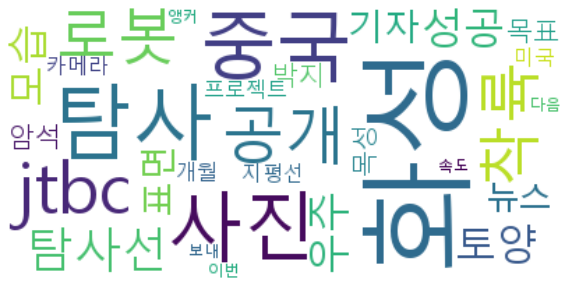

In [14]:
def makeWordCloud(argStr, argNumWord, argLstPosStopWC):
    kkma = konlpy.tag.Kkma()
    lstSent = kkma.sentences(argStr)
#     print(f"{len(lstSent)}\n{lstSent}")
    
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(kkma.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")
    
    lstNormSent = makeLstNormSent(lstPosSent,              # 입력
                                  argLstPosStopWC,         # 제거 품사 리스트
                                  argPos=False,            # 품사정보는 출력하지 않음
                                  argMinLen=2,             # 최소 단어 길이
                                  argOne=True)             # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                   background_color='white',
                   max_words=argNumWord)
    wc.generate(lstNormSent[0])

    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")                                    
    plt.show()

# 형태소 분석하여 불용 품사 및 2음절 이하 단어 제거하고
# 나머지 형태소들로 1개의 문자열을 만듬(단어 수 정의)
lstPosStopWC = ["VX", "VC", "MD", "MA", "IC", "JK", "JX", "JC", "E", "X", "S", "U"]
makeWordCloud(lstTextNews[0], 30, lstPosStopWC)

## RNN Generator

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import re

In [16]:
def makeCorpus(argLstSent):
    lstCorpus = []
    for aSent in argLstSent:
        aSent = aSent.split()
        lstCorpus.append(aSent)
    return lstCorpus

corpusRaw = makeCorpus(lstNormSent)
print(f"{len(corpusRaw)}\n{corpusRaw}")

17
[['붉', '은', '토양', '과', '암석', '화성', '사진', '2', '장', '공개', '앵커', '화성', '착륙', '에', '도', '성공', '하', '고', '다음', '목표', '는', '목성', '이', '라면서', '우주', '탐사', '에', '속도', '를', '내', '고', '있', '는', '중국', '이', 'ㅂ니다', '.'], ['화성', '탐사', '로봇', '이', '찍', '어', '보내', 'ㄴ', '화성', '의', '모습', '들', '을', '이번', '에', '공개', '하', '었', '는데요', '.', '박지', '윤', '기자', '가', '전하', '어', '드리', 'ㅂ니다', '.'], ['기자', '흑백', '사진', '속', '에', '화성', '의', '지평선', '이', '보이', 'ㅂ니다', '.'], ['화성', '의', '거칠', 'ㄴ', '표면', '도', '느껴지', 'ㅂ니다', '.'], ['중국', '의', '화성', '탐사', '로봇', '주룽', '에', '장착', '되', 'ㄴ', '카메라', '가', '촬영', '하', 'ㄴ', '사진', '으로', '광각렌즈', '를', '사용하', '어', '지평선', '은', '곡선', '형태', '가', '되', '었', '습니다', '.'], ['또', '다른', '사진', '은', '태양광', '패널', '과', '안테나', '가', '펼쳐지', 'ㄴ', '모습', '사이', '에', '화성', '의', '붉', '은', '토양', '과', '암석', '을', '보여주', 'ㅂ니다', '.'], ['주', '룽', '의', '뒤편', '에', '달리', 'ㄴ', '카메라', '가', '찍', '은', '컬러', '사진', '이', 'ㅂ니다', '.'], ['중국', '국가', '항', '천국', '이', '어젯밤', '화성', '사진', '2', '장', '을', '처음', '공개', '하', '었', '습니다', 

In [17]:
def getLenMaxSent(argLstStr):
    lenMax = 0
    for aStr in argLstStr:
        lenSent = len(aStr.split())
        if lenMax < lenSent: 
            lenMax = lenSent
    return lenMax

lenMaxSent = getLenMaxSent(lstNormSent)
print(lenMaxSent)

64


In [18]:
# Corpus로 만든 사전 크기 확인.
tokenizerMy = Tokenizer()
tokenizerMy.fit_on_texts(corpusRaw)
sizeVocab = len(tokenizerMy.word_index)
print(f"sizeVocab : {sizeVocab}")

# padding포함한 단어로 tokenize
tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
tokenizerMy.fit_on_texts(corpusRaw)
    
# Encoded corpus 만들기
corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
# print(corpusEncoded)

sizeVocab : 205


In [19]:
def makeTrainData(argCorpusEncoded, argLenMaxSent):
        # 학습용 문장 데이터를 만든다.
    trainDataEncoded = []
    for aSentEncoded in argCorpusEncoded:
        for ith in range(2, len(aSentEncoded)+1):
            aSequence = aSentEncoded[:ith]
            trainDataEncoded.append(aSequence)
            
    trainDataEncodedPad = pad_sequences(trainDataEncoded,
                                        maxlen=argLenMaxSent,
                                        padding='pre')
    # X와 Y로 쪼갠다.
    XTrain    = trainDataEncodedPad[:,:-1]      # 끝에서 두번째 컬럼까지.
    YTrainRaw = trainDataEncodedPad[:, -1]      # 마지막 컬럼.
    
    return XTrain, YTrainRaw

XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
print(XTrain)

# YTrain을 one-hot encoding 해둔다.
YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)
print(YTrain)


[[  0   0   0 ...   0   0  42]
 [  0   0   0 ...   0  42   9]
 [  0   0   0 ...  42   9  28]
 ...
 [  0   0  49 ... 200 201 202]
 [  0  49  50 ... 201 202 203]
 [ 49  50  34 ... 202 203 204]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
def makeRnnModel(argXTrain, argYTrain, argNumWords, argEpochs):
    # Model 생성
    numWords = argNumWords + 1
    numEmb = 10                                  # Embedding 차원수.
    numHidden = 128                              # 메모리셀의 노드수.
    modelRNN = Sequential()
    modelRNN.add(Embedding(numWords, numEmb))
    modelRNN.add(SimpleRNN(units=numHidden,
                           return_sequences=False))# Sequence To Vector.
    modelRNN.add(Dense(units=numWords, activation='softmax'))

    # Optimizer 객체 생성 후 컴파일한다.
    rateLearn = 0.001   # Hyper Parameter 설정
    optMy = Adam(lr=rateLearn)
    modelRNN.compile(loss='categorical_crossentropy',
                     optimizer=optMy,
                     metrics=['accuracy'])
    
    # 학습.
    eStopMy = EarlyStopping(monitor='loss',
                            mode='min',
                            patience=5,
                            verbose=1)          # 조기 종료 허락!
    
    smryMy = modelRNN.fit(argXTrain,
                          argYTrain,
                          epochs=argEpochs,
                          verbose=0,
                          callbacks=[eStopMy])
        
    return modelRNN

modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=30)    

In [21]:
strTmp = "온도가 낮을 수록"
strTmp.split()

['온도가', '낮을', '수록']

In [22]:
# 확률적으로 다음 단어를 예측해 주는 헬퍼 함수.
def stochasticPrediction(argPreds, argTemperature=1.0):
    predsMy = np.array(argPreds).astype('float64')
    # "온도"가 낮을수록 확정적, 높을수록 확률적이 된다.
    predsMy = np.log(predsMy)/ argTemperature
    predsExp = np.exp(predsMy)
    predsMy = predsExp/np.sum(predsExp)
    # 1회 1개의 랜덤 표본만 추출한다.
    probabilities = np.random.multinomial(n=1, pvals=predsMy, size=1)
    return np.argmax(probabilities)

# 예측을 위한 헬퍼 함수 버전 2.
def makeSentRnn(argModel, argToken, argLstSeed, argLenMaxSent, argNumSeq, temperature=1.0): 
#     print(argToken.word_index)
    cnt=0
    strOut = argLstSeed.pop(0)[0]
    
    while cnt < argNumSeq:        
        # 완성되가는 문장의 인터저 인코딩.
#         print(strOut)
#         encoded = argToken.texts_to_sequences([strOut])[0]
        encoded = []
        for x in strOut.split():
            encoded.append(argToken.word_index[x])
#         print(encoded)
        
        # Padding을 적용해서 X_test를 만든다.
        XTest = pad_sequences([encoded], maxlen=argLenMaxSent-1, padding='pre')
#         print(XTest)
        
        # softmax를 통해서 출력된 예측은 일종의 "multinomial" 확률이다.
        my_preds = argModel.predict(XTest)
        
        # 다음 단어의 인덱스를 예측한다.
        idx = stochasticPrediction(my_preds[0], temperature)
#         print(f"idx : {idx}")
        
        # 예측된 인덱스를 실제 단어로 변환.
        wordPred = argToken.index_word[idx]
#         print(wordPred)

        if wordPred not in [".",  "?", "!", ".-sf", "?-sf", "!-sf"]:
            # 예측된 단어를 결과 문장에 이어 붙인다.
            strOut += " "  + wordPred
        else:
            strOut += " " + wordPred + " " + argLstSeed.pop(0)[0]
        
        cnt += 1
        
    return strOut


lstSeed01 = lstSeed[:]
#lstSeed01 = [('법사 위원장', ['문제']), ('상임 위원장', ['모두', '문제', '배분', '자리', '재배']), ('위원장 문제', ['관련', '마무리', '언급', '특히']), ('인사 청문회', ['뇌관', '물론', '부터', '진행']), ('권한 대행', ['원내', '이날', '특히']), ('대표 대행', ['반도체', '호중', '후보자']), ('서울 경제', ['기현', '무단', '폴리']), ('위원장 자리', ['배분', '야당', '요구']), ('공장 방문', ['ㄴ다는', '예정']), ('국회 에서', ['가지', '기자']), ('논의 난항', ['기현', '으로']), ('다음 절차', ['진행', '진행하']), ('대표 16', ['법사', '서울']), ('민주당 의원', ['위원장', '총회']), ('부동 산세', ['법안', '완화']), ('손실 보상법', ['부동', '입법']), ('원내 대표', ['16', '지나']) ]
makeSentRnn(modelRNN,
            tokenizerMy,
            lstSeed01,
            lenMaxSent,
            100,
            temperature=0.5)

'탐사 로봇 뒤편 에 어 에서 ㄴ 화성 를 를 하 ㄹ 세 이 을 ㅂ니다 . 화성 탐사선 rights reserved . jtbc 뉴스 오 습니다 . 목표 목성 고 표면 금지 중국 이 ㅂ니다 . 박지 기자 기자 kr 처음 하기 로 여울 것 이 ㅂ니다 . 중국 화성 지평선 영상 토양 조합 여울 찬성 분야 되 . 착륙 성공 를 표면 하 조합 . 토양 암석 었 습니다 . 화성 사진 속 남부 와 어 개월 었 습니다 . 화성 탐사 및 홍 여울 시청자 와 https ! 화성 표면 뉴스 화성 1 과 분석 표면 ㅂ니다 . 10 개월 화성 룸 관점 동영상 만 와 되 외 ㅂ니다 . 15 오전 붉 홍 7 시청자 와 최근 보여주 ㅂ니다 . all rights 탐사선 홍 등'

#### 1. RNN With Normal/Ending

In [23]:
def addClosingToSent(argLstSent):
    lstSentAddClosing = []
    endingPre = ". "
    for aSent in argLstSent:
        aSent = endingPre + aSent
        lstSentAddClosing.append(aSent)
        
        ending = aSent.split()[-1][-1]
        if ending in [".", "!", "?"]:
            endingPre = ending + " "
    return lstSentAddClosing

lstSentAddClosing = addClosingToSent(lstSent)
print(f"{len(lstSentAddClosing)}\n{lstSentAddClosing}")


17
['. 붉은 토양과 암석 화성 사진 2 장 공개 앵커 화성 착륙에도 성공하고 다음 목표는 목성이라면서 우주 탐사에 속도를 내고 있는 중국입니다.', '. 화성 탐사 로봇이 찍어 보낸 화성의 모습들을 이번에 공개했는데요. 박지 윤 기자가 전해 드립니다.', '. 기자 흑백 사진 속에 화성의 지평선이 보입니다.', '. 화성의 거친 표면도 느껴집니다.', '. 중국의 화성 탐사 로봇 주룽에 장착된 카메라가 촬영한 사진으로 광각렌즈를 사용해 지평선은 곡선 형태가 됐습니다.', '. 또 다른 사진은 태양광 패널과 안테나가 펼쳐진 모습 사이에 화성의 붉은 토양과 암석을 보여줍니다.', '. 주 룽의 뒤편에 달린 카메라가 찍은 컬러 사진입니다.', '. 중국 국가 항 천국이 어젯밤 화성 사진 2 장을 처음 공개했습니다.', '. 이 외에도 화성 탐사선 톈 원 1호가 분리되는 모습 등 2개의 동영상도 공개했습니다.', '. 중국의 화성 탐사선 톈 원 1호는 지난 15일 오전 화성 유토피아 평원 남부에 착륙했습니다.', '. 지난해 7 월 로켓 창정 5호에 실려 지구를 떠난 지 10개월 만입니다.', '. 이 들 탐사선과 탐사 로봇은 앞으로 3개월 동안 화성 표면과 토양 대기에 대한 조사를 할 예정입니다.', '. 장 룽 차 오 화성 탐사 프로젝트 총 설계자 나중에 우리의 화성 탐사선은 화성 표면을 순찰하고 탐사하는 임무를 수행할 것입니다.', '. 탐사 로봇이 착륙 선에서 내려와 상태를 점검하고 경로를 계획합니다.', '. 미국과 구소련에 이어 세계에서 세 번째로 화성 착륙에 성공한 중국은 앞으로의 목표는 목성이라고 밝혔습니다.', '. 최근 굵직한 우주 프로젝트를 잇달아 성공시킨 중국은 우주 개발 분야에서 미국과 함께 초강대국의 반열에 올랐습니다.', '. 박지 윤 기자 park.jiyoon jtbc.co .kr 영상 편집 홍 여울 시청자와 함께! jtbc 뉴스 제보 하기 관점과 분석이 있는 뉴스 jtbc 뉴스 룸 이 조합 찬성! 백지 영 x이 무진 사랑 안 해 c

In [24]:
def genSentByRnn(argStr, argLstPosStop, argType="Norm", argEpochs=100):

#     print(argStr)
    kkma = konlpy.tag.Kkma()
    lstSent = kkma.sentences(argStr)
    
    if argType=="Ending":
        lstSent = addClosingToSent(lstSent)
        
#     print(f"{len(lstSent)}\n{lstSent}")
        
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(kkma.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,            # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=False,          # 품사정보는 출력하지 않음
                                  argMinLen=0,           # 최소 단어 길이
                                  argOne=False)           # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    lstNGram = makeNGram(lstNormSent, argNum=3)
#     print(f"{len(lstNGram)}\n{lstNGram}")    
    dicBase = makeBaseDic(lstNGram)
#     print(f"{len(dicBase)}\n{dicBase}")
    lstSeed =makeLstSeed(dicBase)
#     print(f"{len(lstSeed)}\n{lstSeed[:10]}")

    corpusRaw = makeCorpus(lstNormSent)
#     print(f"{len(corpusRaw)}\n{corpusRaw}")

    lenMaxSent = getLenMaxSent(lstNormSent)
    print(f"lenMaxSent : {lenMaxSent}")

    tokenizerMy = Tokenizer()
    tokenizerMy.fit_on_texts(corpusRaw)
    sizeVocab = len(tokenizerMy.word_index)
    print(f"sizeVocab : {sizeVocab}")

    tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
    tokenizerMy.fit_on_texts(corpusRaw)
#     print(tokenizerMy.word_index)
    
    corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
#     print(corpusEncoded)

    XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
    YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)

    modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=argEpochs)

#     lstSeed = [('법사 위원장', ['문제']), ('상임 위원장', ['모두', '문제', '배분', '자리', '재배']), ('위원장 문제', ['관련', '마무리', '언급', '특히']), ('인사 청문회', ['뇌관', '물론', '부터', '진행']), ('권한 대행', ['원내', '이날', '특히']), ('대표 대행', ['반도체', '호중', '후보자']), ('서울 경제', ['기현', '무단', '폴리']), ('위원장 자리', ['배분', '야당', '요구']), ('공장 방문', ['ㄴ다는', '예정']), ('국회 에서', ['가지', '기자']), ('논의 난항', ['기현', '으로']), ('다음 절차', ['진행', '진행하']), ('대표 16', ['법사', '서울']), ('민주당 의원', ['위원장', '총회']), ('부동 산세', ['법안', '완화']), ('손실 보상법', ['부동', '입법']), ('원내 대표', ['16', '지나']) ]

    strRes = makeSentRnn(modelRNN,
                         tokenizerMy,
                         lstSeed,
                         lenMaxSent,
                         100,
                         temperature=0.1)
    return strRes

lstPosStop=[]
genSentByRnn(lstTextNews[0], lstPosStop, argType="Norm", argEpochs=50)

lenMaxSent : 64
sizeVocab : 205


'탐사 로봇 이 찍 선 보내 내려오 화성 의 과 이 하 ㄴ 는 으로 jtbc 뉴스 jtbc 아 호 jtbc 개월 joins . 화성 탐사선 rights jtbc . jtbc 뉴스 및 재 편집 금지 여울 시청자 와 함께 ! 목표 목성 제보 하기 관점 과 분석 이 있 는 뉴스 jtbc 뉴스 룸 이 조합 찬성 ! 박지 기자 x 이 무진 사랑 안 해 copyright by jtbc https jtbc . 중국 화성 com co . 착륙 성공 편집 홍 여울 시청자 와 함께 ! 토양 암석 제보 하기 관점 과 분석 이 있 는 뉴스 jtbc 뉴스 룸 이 조합 찬성 ! 화성 사진 x 이 무진 사랑 안 해 copyright by jtbc https jtbc . 화성 탐사'

#### 2. RNN with POS

In [25]:
def makeNGramWithPos(argLstSent, argNum=3):
    vectMy = CountVectorizer(ngram_range=(argNum, argNum),
                             token_pattern=r"(?u)\b\w\w+-\w+\b",
                             analyzer="word")
    lstNGram = vectMy.fit(argLstSent).get_feature_names()
    # ar2NGramCnt = vectMy.transform(argLstSent).toarray()  # 결과는 array of array.
    # lstNGramCnt = list(ar2NGramCnt[0])                    # 단순한 리스트로 변환.
    return(lstNGram)

In [26]:
#custom dictionary
strSent = "코로나-nng 19-nr 확산-nng 세가-nng 지속-nng 하-xsv 면서-ece 전국-nng \
곳곳-nng 에서-jkm 확-mag 진자-nng 가-jks 잇따르-vv 고-ece 있-vxv 다-efn .-sf 이-jks \
지나-vv ㄴ-etd 명-nnm 이-jks 코로나-nng 19-nr 확-mag 진-nng 판정-nng 을-jko 받-vv \
았-ept 다-efn .-sf 이-jks 지나-vv 1-nr 명-nnm 이-jks 확-mag 진-nng 되-xsv 었-ept \
다-efn .-sf 이-jks 확-mag 진자-nng 가-jks 발생-nng 하-xsv ㄴ-etd 건물-nng 전체-nng \
를-jko 소독-nng 하-xsv 었-ept 고-ece 해당-nng 건물-nng 에서-jkm 근무-nng 하-xsv \
는-etd 직원-nng 전원-nng 을-jko 대상-nng 으로-jkm 진단-nng 검사-nng 를-jko \
진행하-vv 었-ept 다-efn .-sf 이-jks 확-mag 진-nng 되-xsv 었-ept 다-efn .-sf \
이-jks 대학생-nng 1-nr 명-nnm 등-nnb 되-xsv 었-ept 명-nnm 이-jks 확-mag 진자-nng \
되-xsv 었-ept 다-efn .-sf 확-mag 진자-nng 1-nr 명-nnm"

def constNormSent(argStr):
    lstRet = []
    for elm in argStr.split(" "):
        lstRet.append(elm.split("-")[0])
    return " ".join(lstRet)

print(constNormSent(strSent))    

코로나 19 확산 세가 지속 하 면서 전국 곳곳 에서 확 진자 가 잇따르 고 있 다 . 이 지나 ㄴ 명 이 코로나 19 확 진 판정 을 받 았 다 . 이 지나 1 명 이 확 진 되 었 다 . 이 확 진자 가 발생 하 ㄴ 건물 전체 를 소독 하 었 고 해당 건물 에서 근무 하 는 직원 전원 을 대상 으로 진단 검사 를 진행하 었 다 . 이 확 진 되 었 다 . 이 대학생 1 명 등 되 었 명 이 확 진자 되 었 다 . 확 진자 1 명


In [27]:
def enhancedSeed(argLstSeed):
    lstResult = []
    for elm in argLstSeed:
        strSeed = elm[0]
        lstTmp = strSeed.split()
        if(    re.search("^nn", lstTmp[0].split('-')[1])
            and re.search("^nn", lstTmp[1].split('-')[1]) ):
            lstResult.append(elm)
    return lstResult

def genSentByRnnWithPos(argStr, argLstPosStop, argEpochs=100):

#     print(argStr)
    kkma = konlpy.tag.Kkma()
    lstSent = kkma.sentences(argStr)
#     print(f"{len(lstSent)}\n{lstSent}")
        
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(kkma.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,            # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=True,          # 품사정보는 출력하지 않음
                                  argMinLen=0,           # 최소 단어 길이
                                  argOne=False)           # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    lstNGram = makeNGramWithPos(lstNormSent)
#     print(f"{len(lstNGram)}\n{lstNGram}")    
    dicBase = makeBaseDic(lstNGram)
#     print(f"{len(dicBase)}\n{dicBase}")
    lstSeed =makeLstSeed(dicBase)
#     print(f"{len(lstSeed)}\n{lstSeed[:10]}")
    
    
    lstSeed = enhancedSeed(lstSeed)
#     print(f"{len(lstSeed)}\n{lstSeed[:10]}")
    

    corpusRaw = makeCorpus(lstNormSent)
    lenMaxSent = getLenMaxSent(lstNormSent)
    print(f"lenMaxSent : {lenMaxSent}")
    
    tokenizerMy = Tokenizer()
    tokenizerMy.fit_on_texts(corpusRaw)
    sizeVocab = len(tokenizerMy.word_index)
    print(f"sizeVocab : {sizeVocab}")

    tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
    tokenizerMy.fit_on_texts(corpusRaw)
#     print(tokenizerMy.word_index)
    
    corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
#     print(corpusEncoded)

    XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
    YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)
#     print(XTrain[:10])

    modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=argEpochs)

    strRes = makeSentRnn(modelRNN,
                         tokenizerMy,
                         lstSeed,
                         lenMaxSent,
                         100,
                         temperature=0.1)
    strRes = constNormSent(strRes)
    
    return strRes
    

lstPosStop=[]
strResult = genSentByRnnWithPos(lstTextNews[0], lstPosStop, argEpochs=50)
strResult

lenMaxSent : 64
sizeVocab : 219


'탐사 로봇 이 착륙 선 에서 내려오 아 상태 를 점검 하 고 경로 를 계획 하 ㅂ니다 . 화성 탐사선 를 수행 com 시청자 와 함께 ! 목표 목성 제보 이 관점 에 도 하 었 었 . 박지 기자 기자 가 전하 어 드리 ㅂ니다 . 중국 화성 설계자 남부 전하 어 에 속도 뉴스 조사 하기 하 ㄹ 예정 이 ㅂ니다 . 착륙 성공 설계자 가 에 우리 의 화성 탐사선 은 화성 표면 을 순찰 하 고 탐사 하 는 임무 를 수행 하 ㄹ 것 이 ㅂ니다 . 토양 암석 화성 유토피아 평원 어 에 공개 ㅂ니다 었 의 목표 는 가 이 가 . 화성 사진 편집 이 내 지'

#### 3. Testing


========== Normal Sentence =====================================================
 허윤정의 의료세상 1억6400만 명이 감염되고 34만5000여 명이 사망한 코로나의 끝은 어디일까? 전문가들은 코로나19 종식은 불가능하다고 예측한다. 인류는 코로나와 공존하는 엔데믹 endemic 시대를 살아가는 지혜를 터득해야 한다. 마스크를 벗고 자유롭게 외출하고 친구를 만나고 해외여행을 갈 수 있을까? 집단면역에 도달하면 가능해질까? 국민의 일정 수준 이상이 면역력을 가지면 집단면역에 도달한다. 이는 코로나 감염과 백신 접종 두 가지 방법으로 가능하다. 역설적으로 코로나19 감염률이 높고 일찍 백신을 확보한 미국 영국 이스라엘 같은 국가는 집단면역 가능성이 높다. 이미 면역력을 가진 사람 비율이 높고 감염 위험으로 백신 접종의 수용성이 높기 때문이다. 집단면역 달성을 위해 사용할 수 있는 정책은 백신의 접종률을 높이는 길 뿐이다. 백신 이상 반응이 잘못 알려져 접종에 부정적인 인식이 접종 기피로 이어지지 않도록 백신 보도에 균형이 필요하다. 한국에서 백신 접종 후 신고 된 이상 반응 비율은 0.2 에 수준이며 90 가 경미한 이상 반응이다. 아나필락시스를 비롯한 중중 이상이 생겼을 때 부적절한 현장 대응으로 문제가 된 경우도 거의 없다. 희귀혈전증의 경우도 외국에서는 100백만 명 가운데 5명이 발생하고 있지만 한국에서는 코로나 백신과 직접 연관된 혈전증 사례조차 없다. 백신을 접종했을 때 이득이 이상 반응과 비교할 수 없을 만큼 크다고 전문가들은 조언한다. 코로나19 전체 환자 중 60세 이상은 27 인데 코로나19 사망자의 95 가 60대 이상이다. 감염되면 100명 중 5명이 사망할 만큼 치명률이 높아 60대 이상은 백신접종이 중요하다. 60대 이상에게 접종한 결과 접종 2주 후부터 89.5 이상의 감염예방효과가 확인됐고 치명률을 낮추는 사망예방효과는 100 로 나타났다. 18일 정부가 집계한 70 7

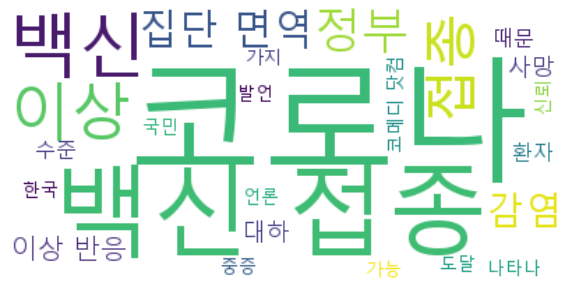


========== Generated by Trigram ================================================
 백신 접종 ㄴ다면 중증 환자 사망자 줄어들 방역 수준 조정 기대 코로나 19 자가 상대적 으로 백신 접종 여행 발언 정부 근거 없다 반론 면서 백신 접종 중요 이상 반응 자의 지원 지속 어야 ㄴ다 집단 면역 가능성 60 이상 에게 접종 결과 접종 부터 89 이상 감염 예방 효과 확인 치명률 낮추 사망 예방 효과 확인 치명률 낮추 사망 예방
lenMaxSent : 64
sizeVocab : 418

========== Generated by RNN : Normal ===========================================
백신 접종 후 사망 보도 의 속도 경쟁 으로 왜곡 되 ㄴ 일부 언론 의 행태 는 백신 접종 률 을 낮추 는 결과 로 나타나 ㄹ 수 있 어 언론 스스로 의 자율 규제 도 필요 하 다 . 코로나 19 자가 안전 이 가 기 때문 이 다 . 이상 반응 이 높 어 이상 하 는 이상 이 고 정치인 의 사망 같 은 틀리 었 다고만 는 없 다 . 집단 면역 ㄴ 도달 하 려면 신뢰 는 투명성 이 견고 해지 도록 정부 언론 의료계 정당 이 협력 하 고 친구 를 만나 고 해외여행 을 갈 ㄹ 수 있 을까 ? 60 이상 하
lenMaxSent : 65
sizeVocab : 418

========== Generated by RNN : Ending ===========================================
백신 접종 후 집단 면역 달성 을 위하 어 사용 하 ㄹ 수 있 는 정책 은 백신 의 접종 률 을 높이 는 길 뿐 이 다 . 코로나 19 감염 지원 도록 소급 적용 도 가능 하 다 . 이상 반응 감염 예방 효과 가 확인 하 었 고 치명률 이 다 . 집단 면역 ㄴ 발언 환자 코 에서 나로 여행길 이 막히 언론 의 정부 는 접종 하 게 을 낮추 으로 사망 되 ㄴ 불신 지 의 보고서 도 백

In [28]:
def strOut(argStr, argStrSubj):
    lenSubj = len(argStrSubj)
    print(f"\n========== {argStrSubj} ", end="")
    print("="*(80-12-lenSubj))
    print(argStr)
    
    
numNews = 1
numWordCloud = 25
numWord = 50
numEpochs=100
lstPosStop=[]
lstPosStopWC = ["VX", "VC", "MD", "MA", "IC", "JK", "JX", "JC", "E", "X", "S", "U"]

def summary():
    naverNewsUrl = "https://news.naver.com"
    lstSumNews = []
    strTmp = ""
    
    lstTextNews = getLstTextNews(naverNewsUrl, numNews)
    for aNews in lstTextNews:
        
        strOut(aNews, "Normal Sentence")
        
        makeWordCloud(aNews, numWordCloud, lstPosStopWC)
        
        # Trigram을 이용하여 50단어로 요약(제거 품사는 없음)
        strTmp = genSentByNGram(aNews, numWord, lstPosStop)
        strOut(strTmp, "Generated by Trigram")
        
        strTmp = genSentByRnn(aNews, lstPosStop, argType="Norm", argEpochs=numEpochs)
        strOut(strTmp, "Generated by RNN : Normal")

        strTmp = genSentByRnn(aNews, lstPosStop, argType="Ending", argEpochs=numEpochs)
        strOut(strTmp, "Generated by RNN : Ending")
        
        strTmp = genSentByRnnWithPos(aNews, lstPosStop, argEpochs=numEpochs)
        strOut(strTmp, "Generated by RNN : POS")


summary()